In [ ]:
import pandas as pd

In [ ]:

import seaborn as sb

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
data = pd.read_csv('/content/student_scores.csv')

In [ ]:
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
plt.show()

In [ ]:
#filtered_data = data[(data['Word count'] <= 3500) & (data['# Shares'] <= 80000)]

colores=['orange','blue']
tamanios=[30,60]

f1 = data['Hours'].values
f2 = data['Scores'].values

asignar=[]

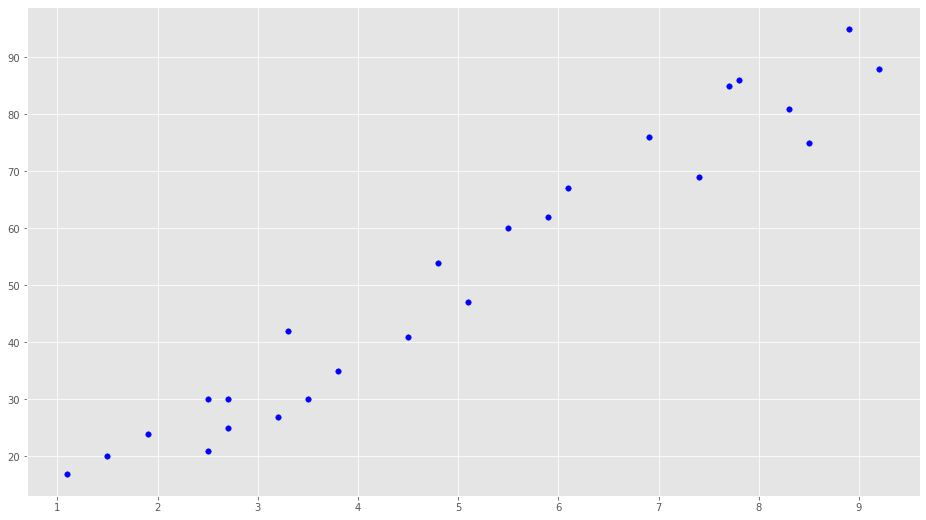

In [ ]:
asignar.append(colores[1])

plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()

In [ ]:
dataX =data[["Hours"]]
X_train = np.array(dataX)
y_train = data['Scores'].values

 
regr = linear_model.LinearRegression()

regr.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = regr.predict(X_train)

In [ ]:
y_Dosmil = regr.predict([[2.7]])
print(int(y_Dosmil))

28


Estudiando dos horas y 27 minutos sacaríamos una nota de 28

In [ ]:
!pip install quandl

In [ ]:
import quandl
import numpy as np
from sklearn import preprocessing, model_selection
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
import datetime

style.use('ggplot')

In [ ]:
style.use('ggplot')

df = quandl.get("WIKI/GOOGL")
df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Low']) / df['Adj. Close'] * 100.0
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0

df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]
forecast_col = 'Adj. Close'
df.fillna(value=-99999, inplace=True)
forecast_out = 1
df['label'] = df[forecast_col].shift(-forecast_out)

In [ ]:
df

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label
Date,,,,,
2004-08-19,50.322842,8.072956,0.324968,44659000.0,54.322689
2004-08-20,54.322689,7.921706,7.227007,22834300.0,54.869377
2004-08-23,54.869377,4.049360,-1.227880,18256100.0,52.597363
2004-08-24,52.597363,7.657099,-5.726357,15247300.0,53.164113
2004-08-25,53.164113,3.886792,1.183658,9188600.0,54.122070
...,...,...,...,...,...
2018-03-21,1094.000000,1.964351,0.130884,1990515.0,1053.150000
2018-03-22,1053.150000,3.254997,-2.487014,3418154.0,1026.550000
2018-03-23,1026.550000,4.082607,-2.360729,2413517.0,1054.090000


In [ ]:
X = np.array(df.drop(['label'], 1))
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

df.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
df.dropna(inplace=True)

y = np.array(df['label'])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

In [ ]:
#Regressors
reg_close = LinearRegression(n_jobs=-1)
reg_close.fit(X_train, y_train)

reg_hl = LinearRegression(n_jobs=-1)
reg_hl.fit(X_train, y_train)

reg_pct = LinearRegression(n_jobs=-1)
reg_pct.fit(X_train, y_train)

reg_vol = LinearRegression(n_jobs=-1)
reg_vol.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [ ]:
last_close = df['Adj. Close'][-1]
last_date = df.iloc[-1].name.timestamp()
df['Forecast'] = np.nan
predictions_arr = X_lately

for i in range(100):
    # Predict next point in time
    last_close_prediction = reg_close.predict(predictions_arr)
    last_hl_prediction = reg_hl.predict(predictions_arr)
    last_pct_prediction = reg_pct.predict(predictions_arr)
    last_vol_prediction = reg_vol.predict(predictions_arr)

    # Create np.Array of current predictions to serve as input for future predictions
    predictions_arr = np.array((last_close_prediction, last_hl_prediction, last_pct_prediction, last_vol_prediction)).T
    next_date = datetime.datetime.fromtimestamp(last_date)
    last_date += 86400

    # Outputs data into DataFrame to enable plotting
    df.loc[next_date] = [np.nan, np.nan, np.nan, np.nan, np.nan, float(last_close_prediction)]

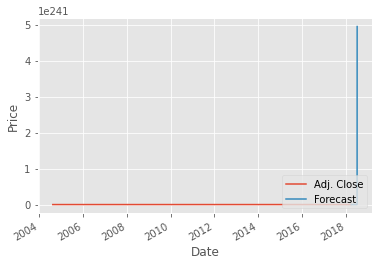

In [ ]:
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

clf_close = RandomForestRegressor(n_jobs=-1)
clf_close.fit(X_train, y_train)

clf_hl = RandomForestRegressor(n_jobs=-1)
clf_hl.fit(X_train, y_train)

clf_pct = RandomForestRegressor(n_jobs=-1)
clf_pct.fit(X_train, y_train)

clf_vol = RandomForestRegressor(n_jobs=-1)
clf_vol.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

Text(0, 0.5, 'Price')

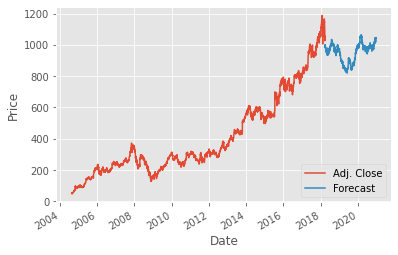

In [ ]:


import quandl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import datetime
import random

style.use('ggplot')

df = quandl.get("WIKI/GOOGL")
df = df[['Adj. Close']]

df.dropna(inplace=True)

# Prepare variables for loop

last_close = df['Adj. Close'][-1]
last_date = df.iloc[-1].name.timestamp()
df['Forecast'] = np.nan

for i in range(1000):
    # Create np.Array of current predictions to serve as input for future predictions
    modifier = random.randint(-100, 105) / 10000 + 1
    last_close *= modifier
    next_date = datetime.datetime.fromtimestamp(last_date)
    last_date += 86400

    # Outputs data into DataFrame to enable plotting
    df.loc[next_date] = [np.nan, last_close]

df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')

In [ ]:
plt.show()